In [5]:
from rx_builder import RXCalibrationBuilder
from qiskit.providers.fake_provider import FakeBelemV2
from qiskit import QuantumCircuit
from qiskit.circuit.library.standard_gates import RXGate, RZGate, HGate, CXGate, SXGate
from qiskit.dagcircuit import DAGCircuit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.converters import circuit_to_dag
from qiskit.providers.fake_provider import FakeBelemV2
from qiskit.transpiler import InstructionProperties, PassManagerConfig, PassManager
from qiskit.transpiler.preset_passmanagers import level_1_pass_manager
from qiskit.circuit import Parameter, Instruction

import numpy as np

In [6]:
backend = FakeBelemV2()

# adding RX gates to backend
rx_properties = {(i,): InstructionProperties() for i in range(backend.num_qubits)}
backend.target.add_instruction(RXGate(Parameter("theta")), properties=rx_properties)

In [7]:
config = PassManagerConfig.from_backend(backend=backend, seed_transpiler=230804)
original_pm = level_1_pass_manager(config)
pm_with_rx_angle_pass = level_1_pass_manager(config)

In [9]:
pm_with_rx_angle_pass.stages
pm_with_rx_angle_pass.post_optimization = PassManager(
    RXCalibrationBuilder(target=backend.target, resolution_in_radian=0.1)
)

In [13]:
rx_cal_builder = RXCalibrationBuilder(target=backend.target, resolution_in_radian=0.1)

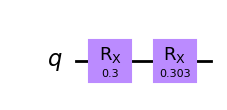

In [12]:
qc = QuantumCircuit(1)
qc.rx(0.3, 0)
qc.rx(0.303, 0)
qc.draw("mpl")

In [14]:
tc = rx_cal_builder(qc)

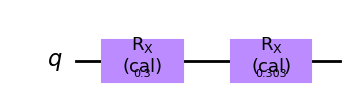

In [15]:
tc.draw("mpl")

In [16]:
rx_cal_builder.already_generated

{0: array([0.3])}

In [17]:
tc.calibrations

{'rx': {((0,),
   (0.3,)): ScheduleBlock(Play(Drag(duration=160, sigma=40, beta=-2.4030014266125312, amp=0.02219793978081927, angle=0), DriveChannel(0)), name="block0", transform=AlignLeft()),
  ((0,),
   (0.303,)): ScheduleBlock(Play(Drag(duration=160, sigma=40, beta=-2.4030014266125312, amp=0.02219793978081927, angle=0), DriveChannel(0)), name="block0", transform=AlignLeft())}}

ParameterView([])